In [1]:
### Name: Awez Sheikh
### Roll no: 32
### Batch: A2


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

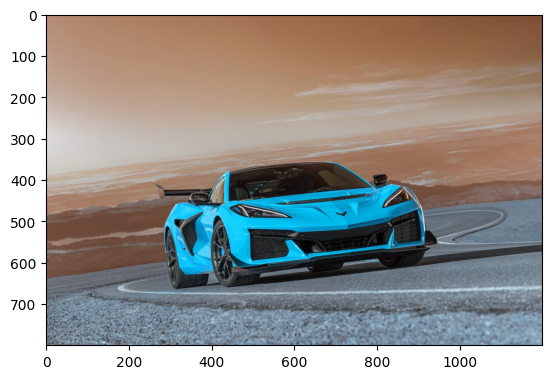

In [ ]:
image = cv2.imread(r"C:\Users\HP\Downloads\123423.jpg")

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image)

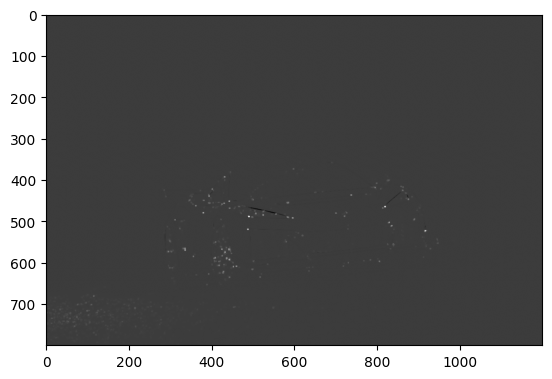

In [ ]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)

dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

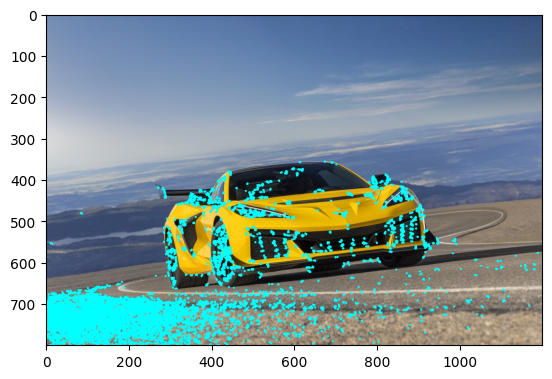

In [ ]:
thresh = 0.001*dst.max()

corner_image = np.copy(image_copy)

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):

            cv2.circle(corner_image, (i,j), 1, (0,255,255),1)

plt.imshow(corner_image)

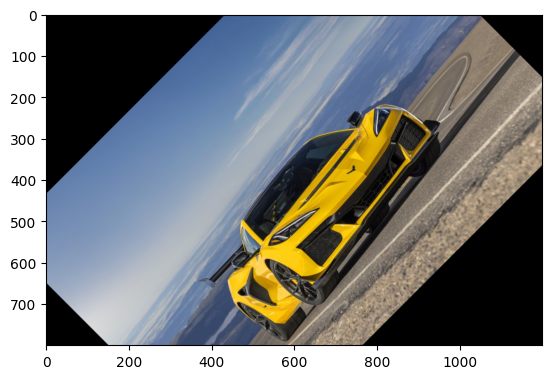

In [ ]:
angle = 45
center = (image_copy.shape[1] // 2, image_copy.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image_copy, rotation_matrix, (image_copy.shape[1], image_copy.shape[0]))
plt.imshow(rotated)

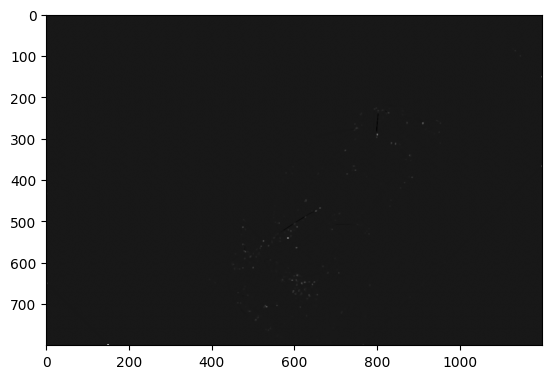

In [ ]:
gray = cv2.cvtColor(rotated, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)

dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

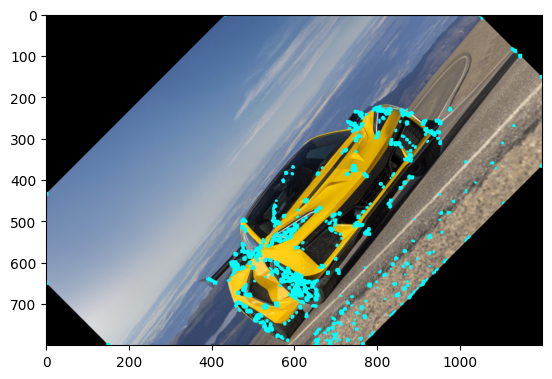

In [ ]:
thresh = 0.007*dst.max()

corner_image1 = np.copy(rotated)

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):

            cv2.circle(corner_image1, (i,j), 1, (0,255,255),1)

plt.imshow(corner_image1)

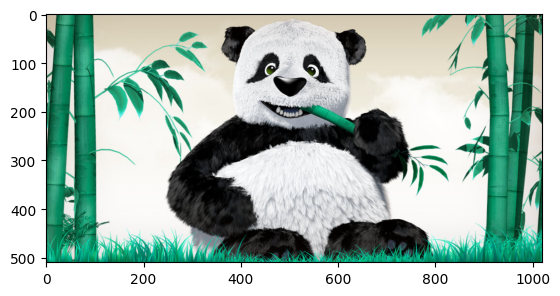

In [ ]:
image1 = cv2.imread("12213.jpg")
plt.imshow(image1)

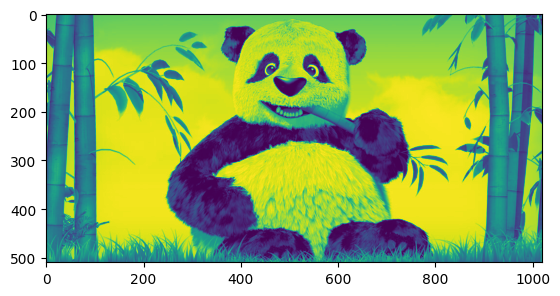

In [ ]:
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

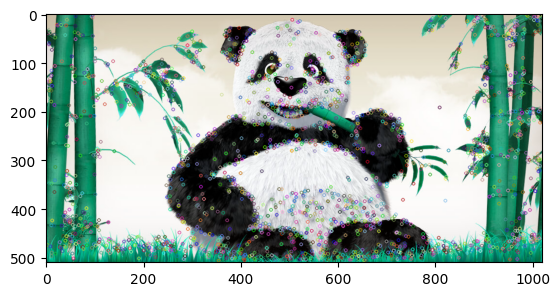

In [ ]:

sift = cv2.SIFT_create()
keypoints_sift, descriptors_sift = sift.detectAndCompute(gray, None)
sift_image = cv2.drawKeypoints(image1, keypoints_sift, None)

plt.imshow(sift_image)

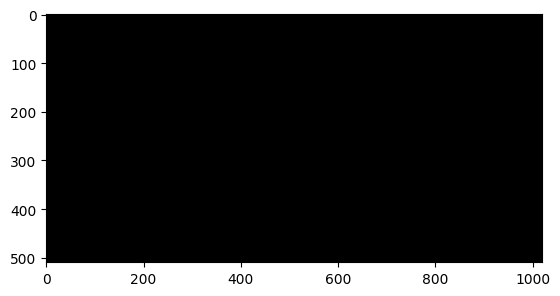

In [ ]:
try:
    surf = cv2.xfeatures2d.SURF_create(400)
    keypoints_surf, descriptors_surf = surf.detectAndCompute(gray, None)
    surf_image = cv2.drawKeypoints(image1, keypoints_surf, None)
except AttributeError:
    surf_image = np.zeros_like(image1)

plt.imshow(surf_image)

In [ ]:
gray_float = np.float32(gray)
harris_corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=7, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)
harris_image = image1.copy()
harris_image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

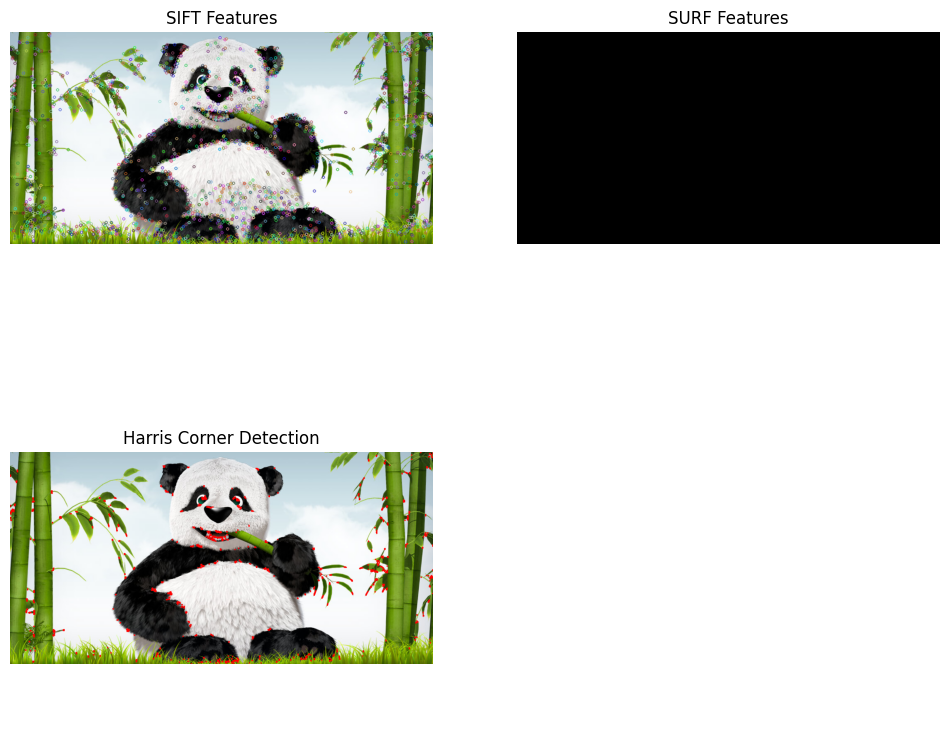

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("SIFT Features")
axes[0, 1].imshow(cv2.cvtColor(surf_image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title("SURF Features")
axes[1, 0].imshow(cv2.cvtColor(harris_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title("Harris Corner Detection")


for ax in axes.flat:
    ax.axis("off")

plt.show()